# Small Project 3

## Exercise 1.

Draw a histogram with marked sigma intervals for random variables
from the normal distribution
$$ f(x) = \dfrac{1}{\sqrt{2\pi}} \exp \left( - \dfrac{x^2}{2} \right) $$

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [43]:
N = 1000
X = np.random.normal(0, 1, N)

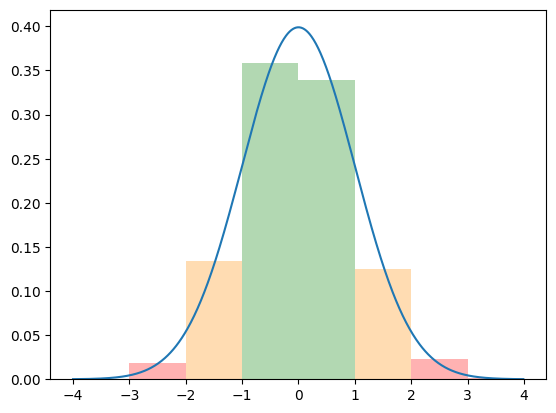

In [44]:
x_args = np.arange(-4, 4, 0.01)
plt.plot(x_args, norm.pdf(x_args, 0, 1))

n, bins, patches = plt.hist(X, bins=np.arange(-4, 5, 1), density=True, alpha=0.3, align="mid", color='red')
patches[2].set_fc('darkorange')
patches[3].set_fc('green')
patches[4].set_fc('green')
patches[5].set_fc('darkorange')
plt.show()

## Exercise 2. 

Check the Pareto rule for variables from the geometric distribution
$$p_k = (1-p)^{k-1}p $$

In [45]:
p = 0.25
N = 1000
X = np.random.geometric(p, N)

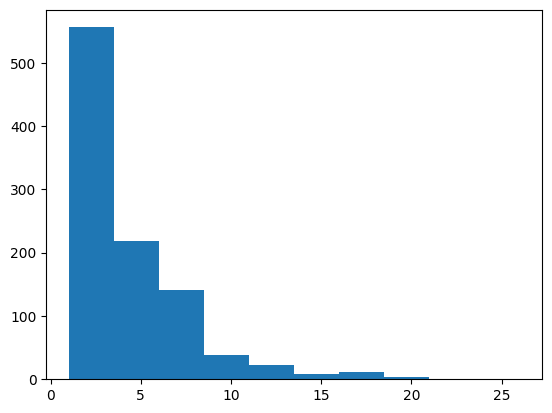

In [46]:
bins = plt.hist(X)

In [47]:
maximum = np.max(X)
q_08 = np.quantile(X, 0.8)
maximum, q_08

(26, 6.0)

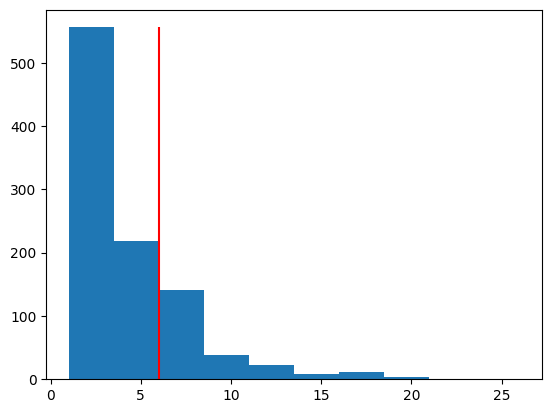

In [48]:
bins = plt.hist(X)
plt.vlines([q_08], 0, max(bins[0]), color='red')

Let's now check the Pareto rule.

In [49]:
print(f"Range of the values: [0, {maximum}]")
print(f"80% of the values in [0, {q_08}], which is about {round(100 * q_08 / maximum)}% of the range.")

Range of the values: [0, 26]
80% of the values in [0, 6.0], which is about 23% of the range.


## Exercise 3

Draw a histogram with marked sigm intervals for variables drawn
from a continuous power distribution

$$ f(x) = \dfrac{\alpha - 1}{x_{min}} \left( \dfrac{x}{x_{min}} \right)^{-\alpha} $$

In [50]:
alpha = 3
X = np.random.pareto(alpha, size=N)
var = alpha / ((alpha - 1)**2 * (alpha - 2))
var

0.75

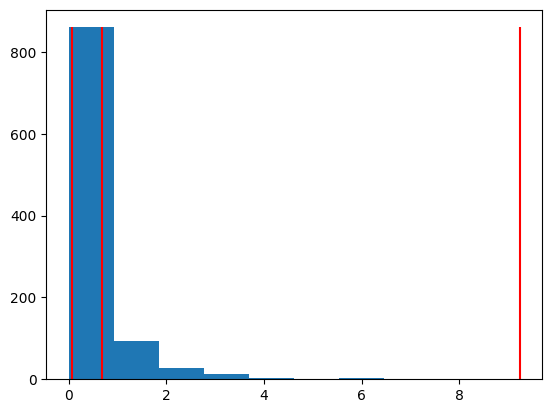

In [51]:
quantiles = [np.quantile(X, 0.2), np.quantile(X, 0.8), np.quantile(X, 1)]
bins = plt.hist(X, bins=N//100)
plt.vlines(quantiles, 0, max(bins[0]), color='red')

In [52]:
maximum = np.max(X)
q_08 = np.quantile(X, 0.8)
maximum, q_08, round(100 * q_08 / maximum, 2)

(9.231610413767571, 0.6846979218356279, 7.42)

## Exercise 4

Pareto Rule for the Zeta distribution:
$$ p_k = \dfrac{1}{\zeta(s)} k^{-s} $$

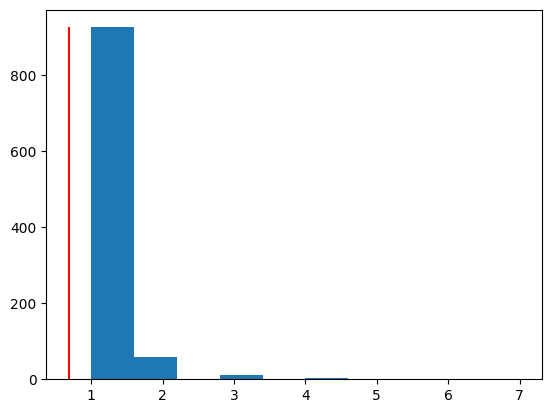

In [53]:
s = 4
X = np.random.zipf(s, N)

bins = plt.hist(X, bins=N//100)
plt.vlines([q_08], 0, max(bins[0]), color='red')

In [54]:
maximum = np.max(X)
q_08 = np.quantile(X, 0.8)
maximum, q_08, round(100 * q_08 / maximum, 2)

(7, 1.0, 14.29)

## Exercise 5

In [55]:
import networkx as nx

In [56]:
ba_network = nx.generators.random_graphs.barabasi_albert_graph(25, 10)

A graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree.

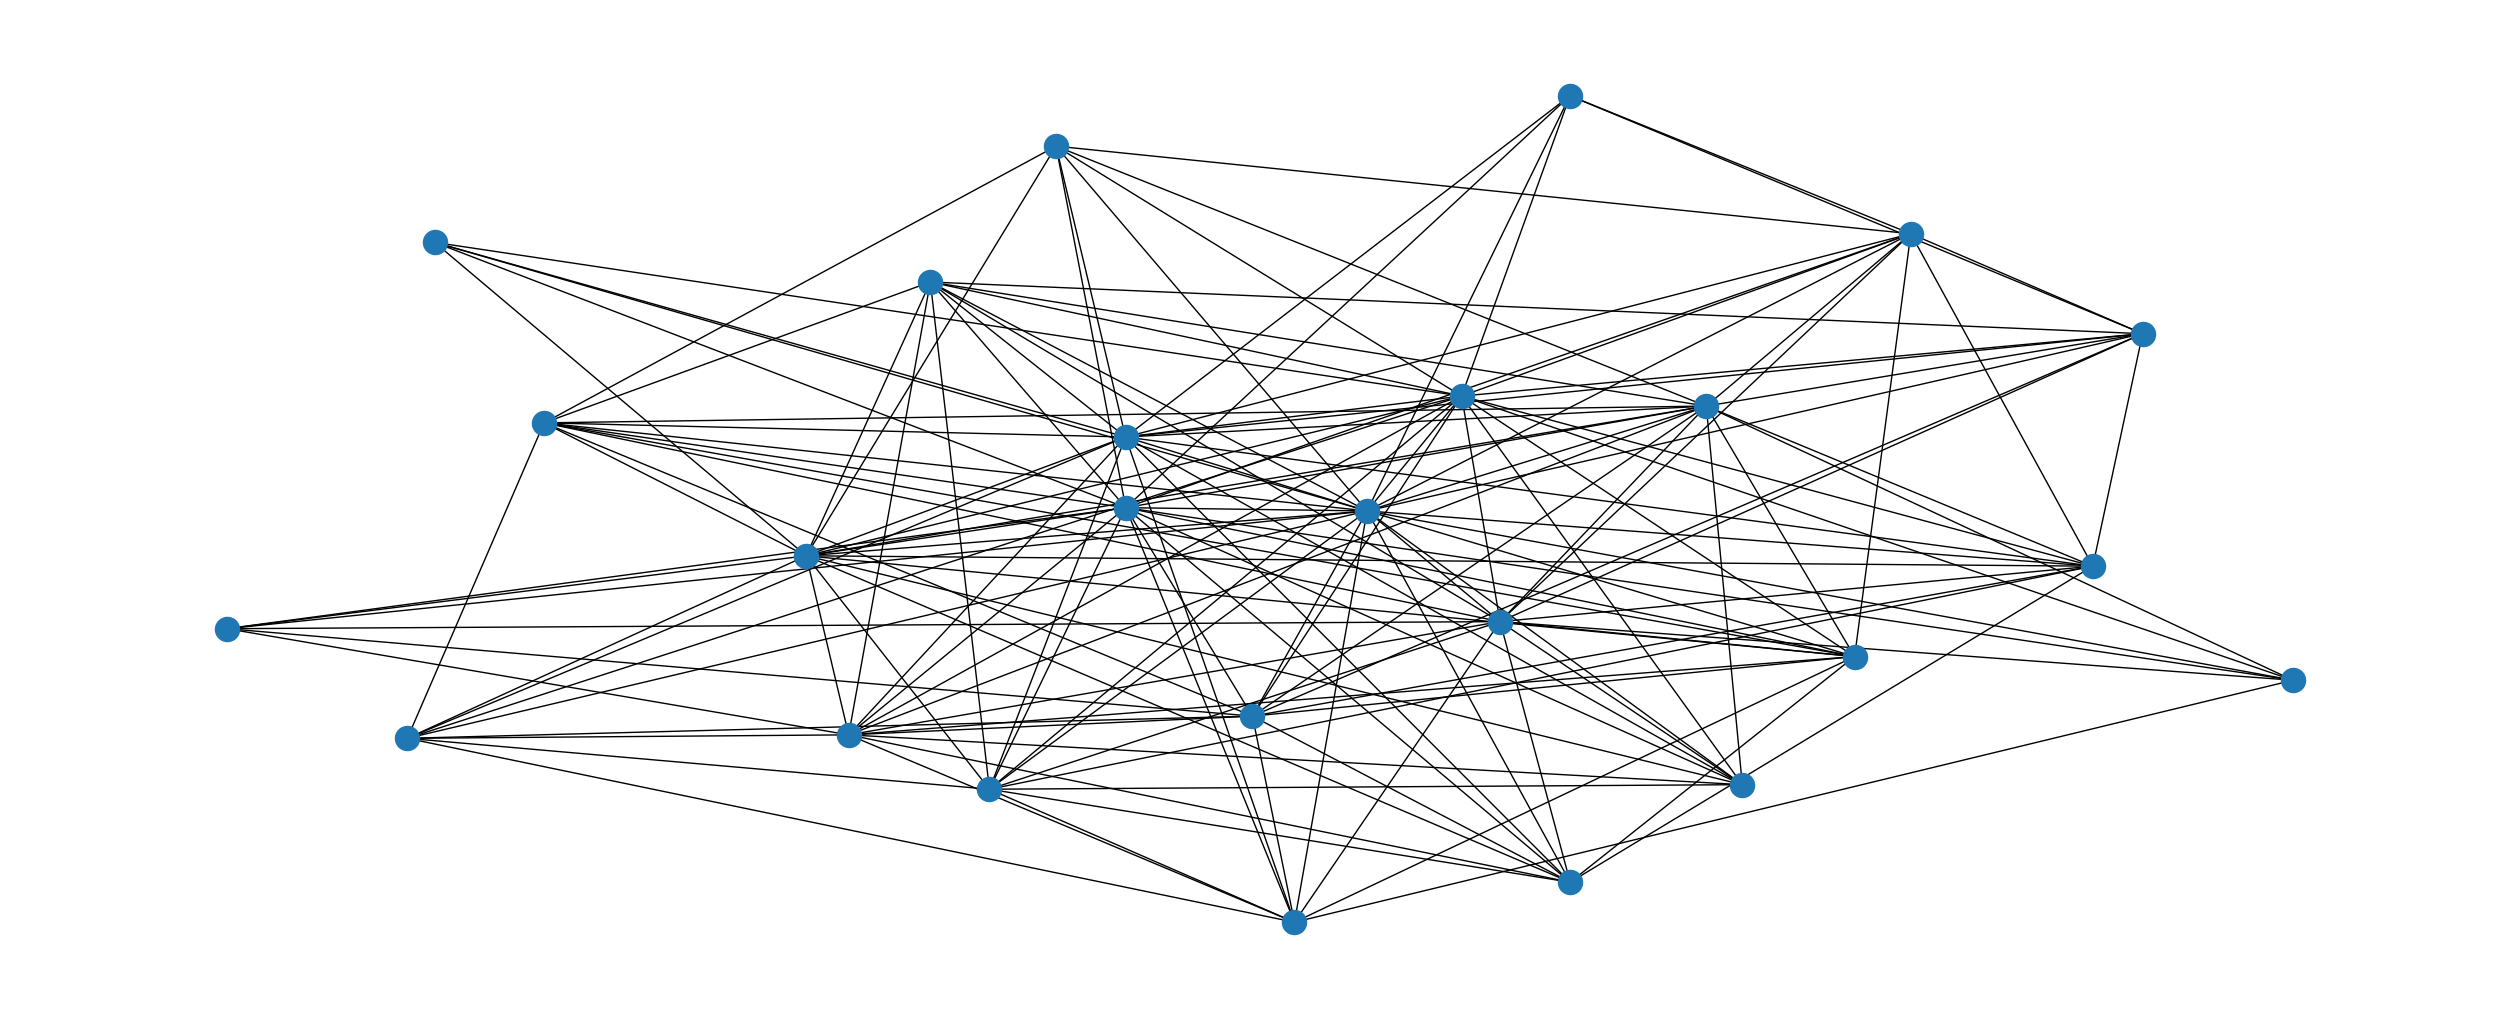

In [57]:
plt.figure(figsize=(25,10))
nx.draw_kamada_kawai(ba_network)

In [58]:
er_network = nx.generators.random_graphs.erdos_renyi_graph(25, 0.7)

The $G_{n, p}$ model chooses each of the possible edges with probability $p.$

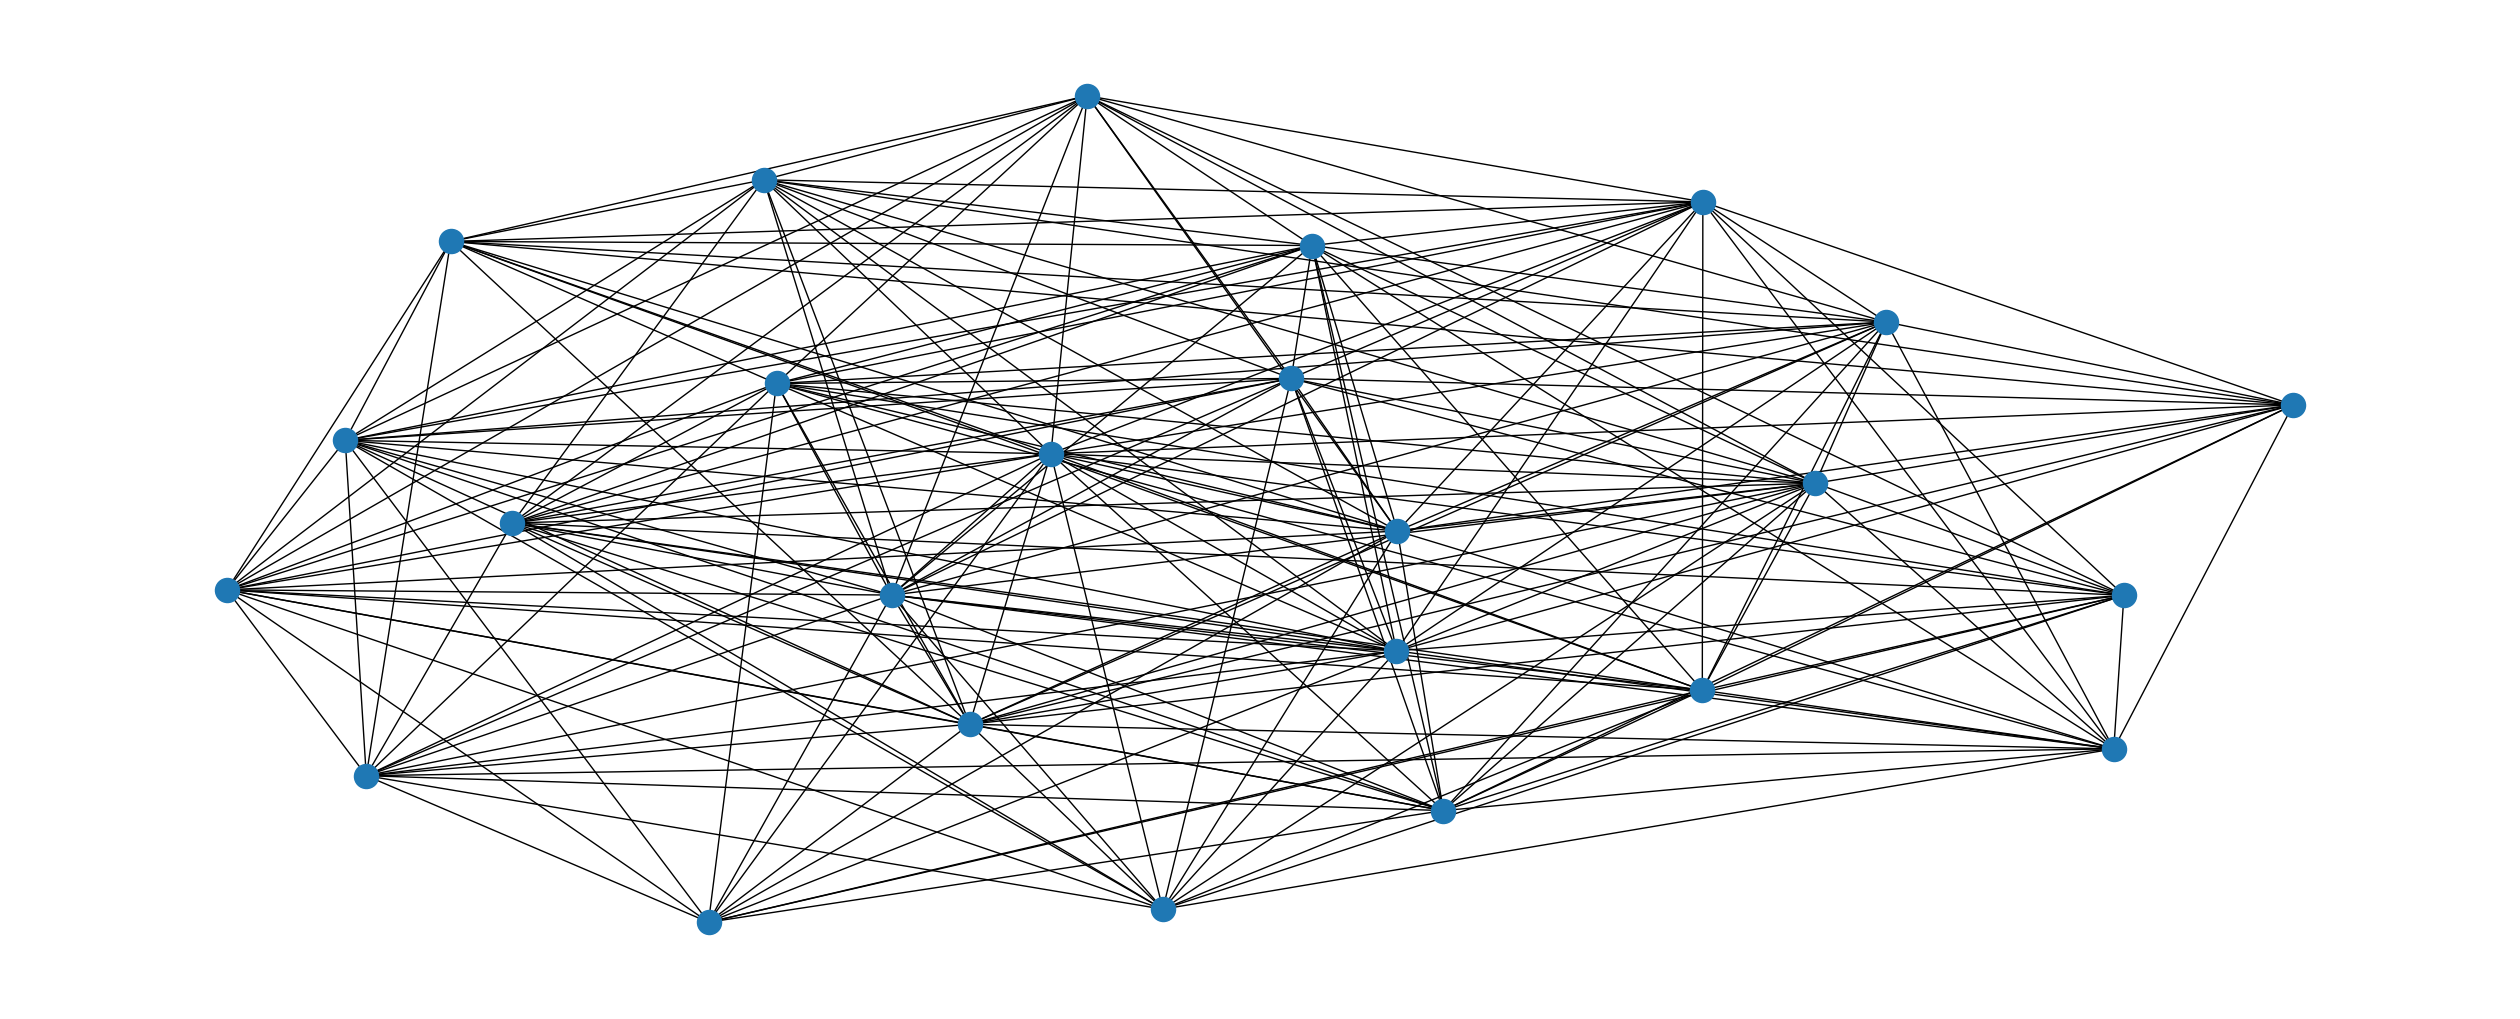

In [59]:
plt.figure(figsize=(25,10))
nx.draw_kamada_kawai(er_network)

In [60]:
import plotly.express as px

In [61]:
degree_sequence = sorted([d for n, d in ba_network.degree()], reverse=True)
fig = px.histogram(degree_sequence)
fig.update_layout(
    xaxis_title="Degree",
    yaxis_title="Count",
    title="Distribution of Degrees in BA Network"
)
fig.show()

In [62]:
degree_sequence = sorted([d for n, d in er_network.degree()], reverse=True)
fig = px.histogram(degree_sequence)
fig.update_layout(
    xaxis_title="Degree",
    yaxis_title="Count",
    title="Distribution of Degrees in ER Network"
)
fig.show()

In [63]:
def estimate_mean_variance(G: nx.Graph):
    degrees = [v for k, v in G.degree]
    return np.mean(degrees), np.var(degrees)

In [64]:
print(f"Barabasi-Albert - (mean, variance) - ({estimate_mean_variance(ba_network)})")

Barabasi-Albert - (mean, variance) - ((12.0, 19.92))


In [65]:
print(f"Erdos-Renyi - (mean, variance) - ({estimate_mean_variance(er_network)})")

Erdos-Renyi - (mean, variance) - ((16.32, 4.3776))


## P3.1

Different graph layout functions.

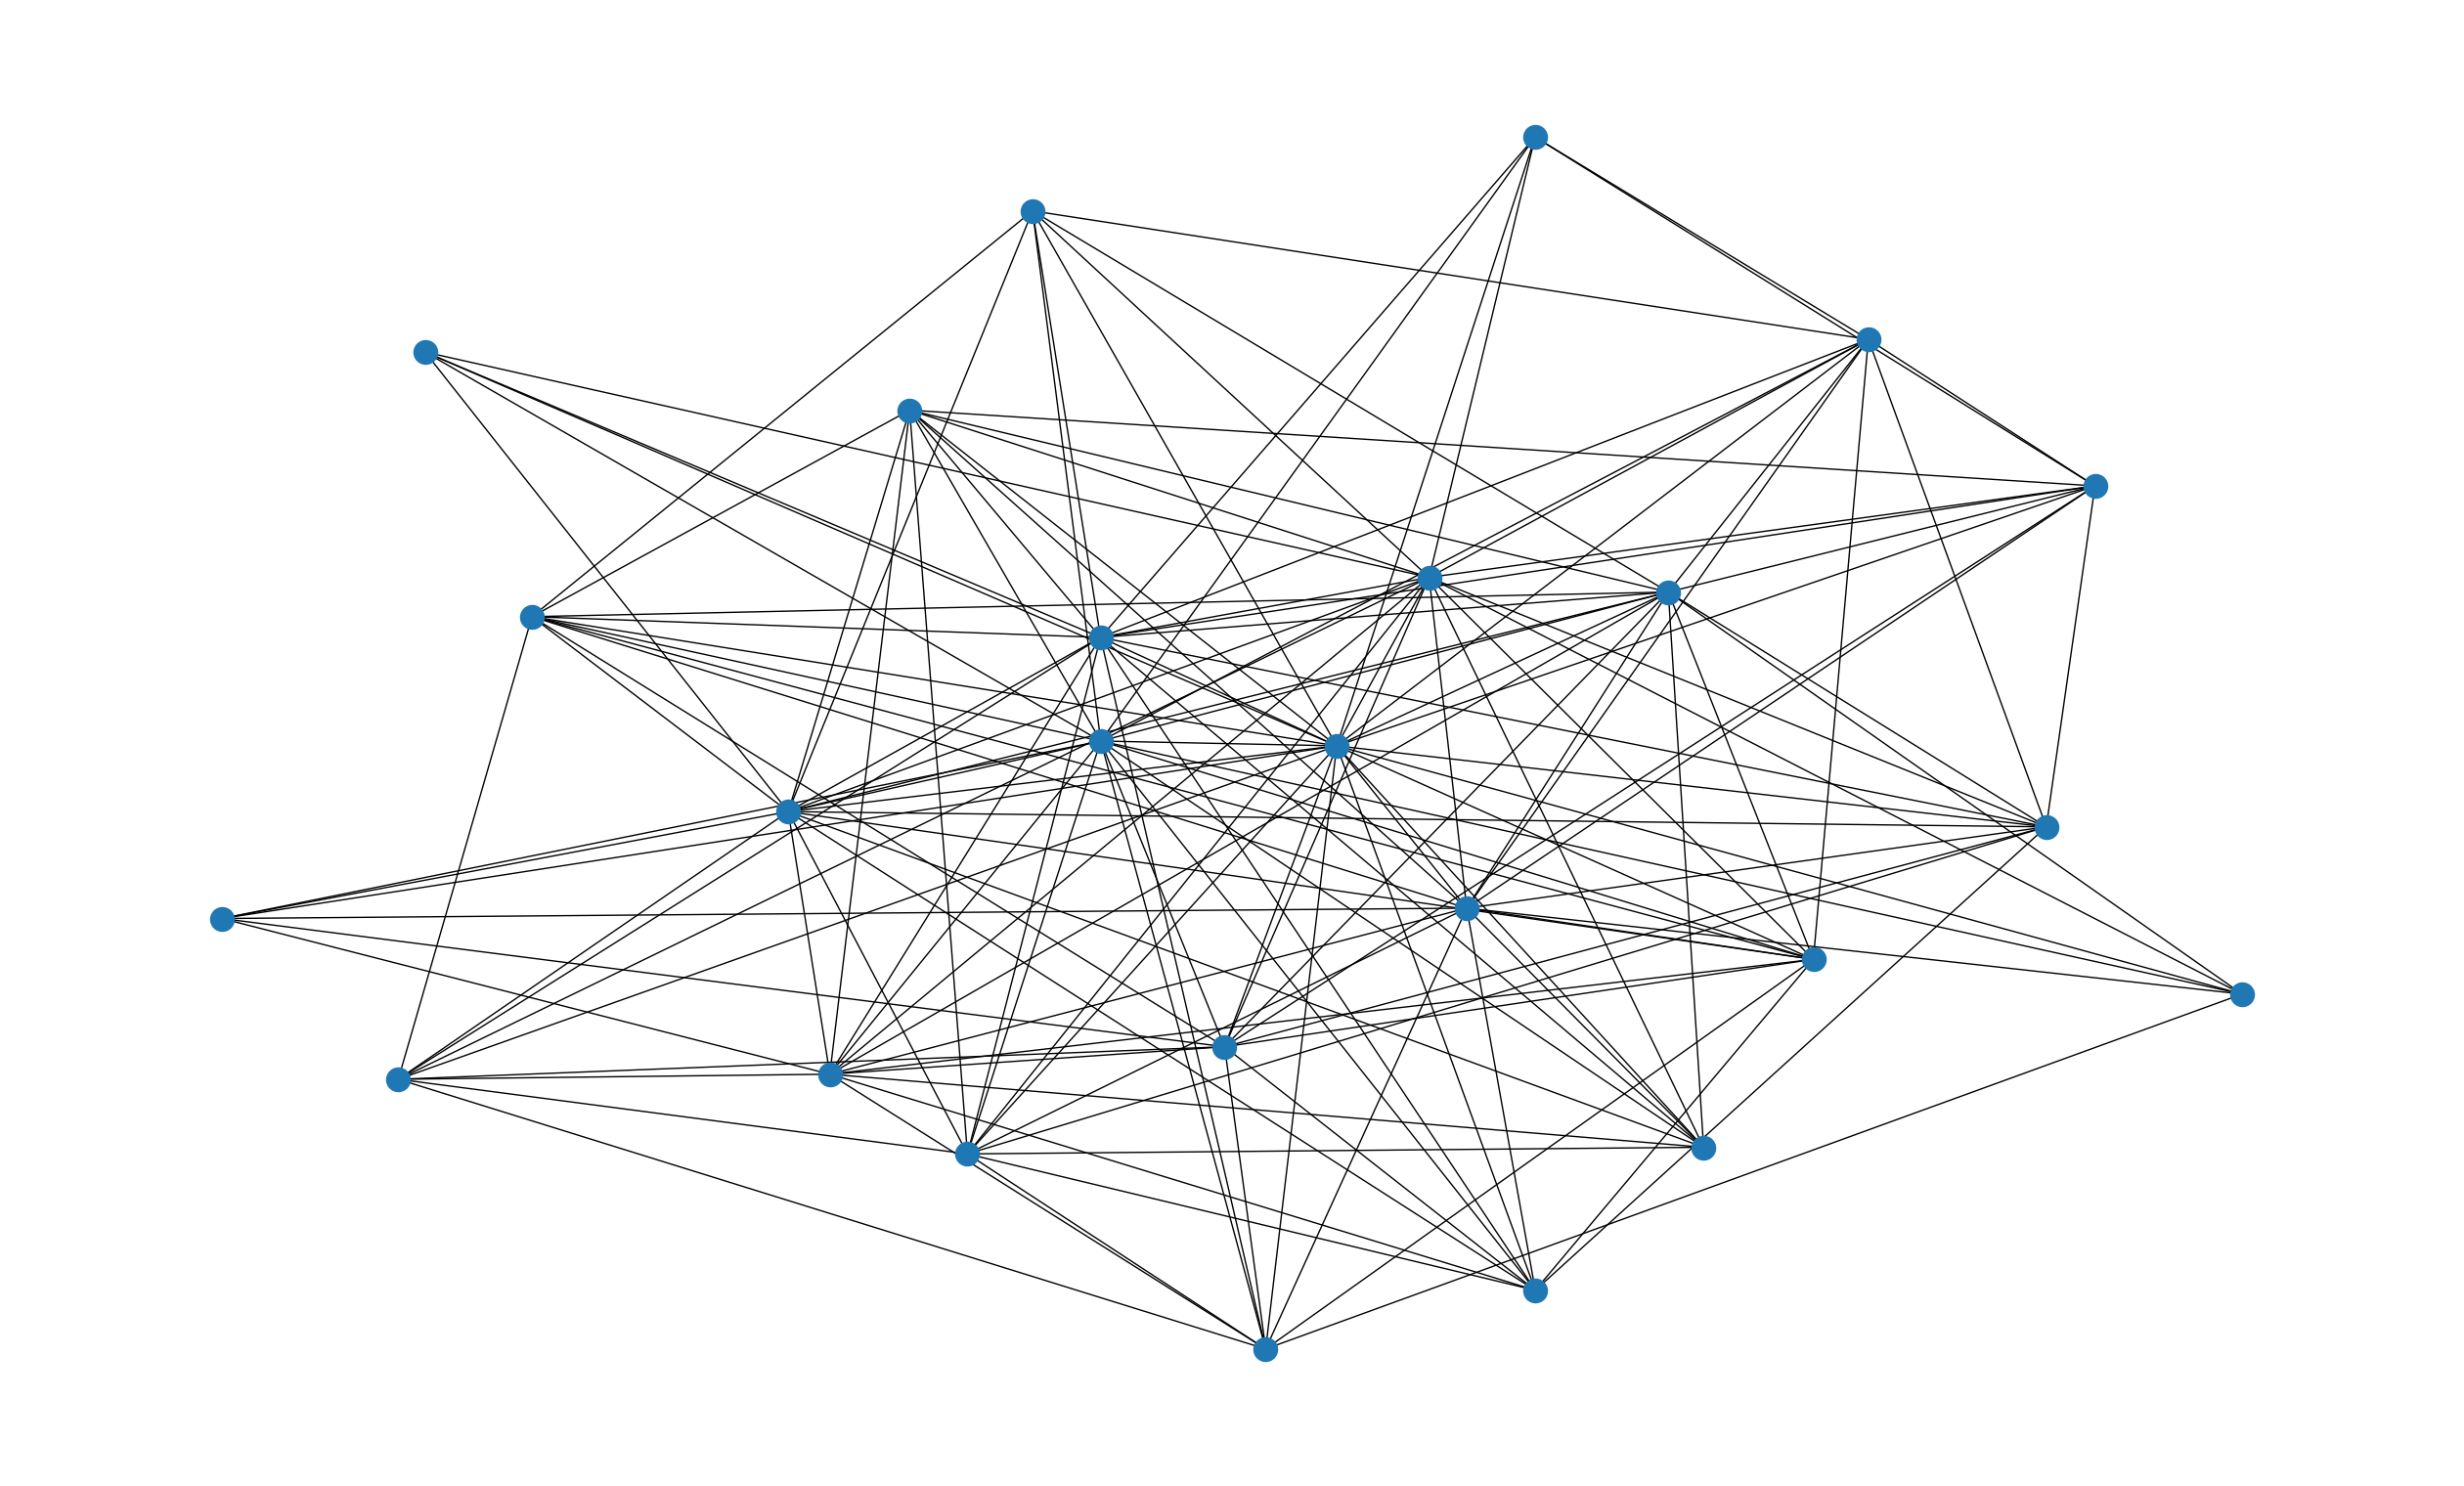

In [66]:
plt.figure(figsize=(25,15))
nx.draw_kamada_kawai(ba_network)

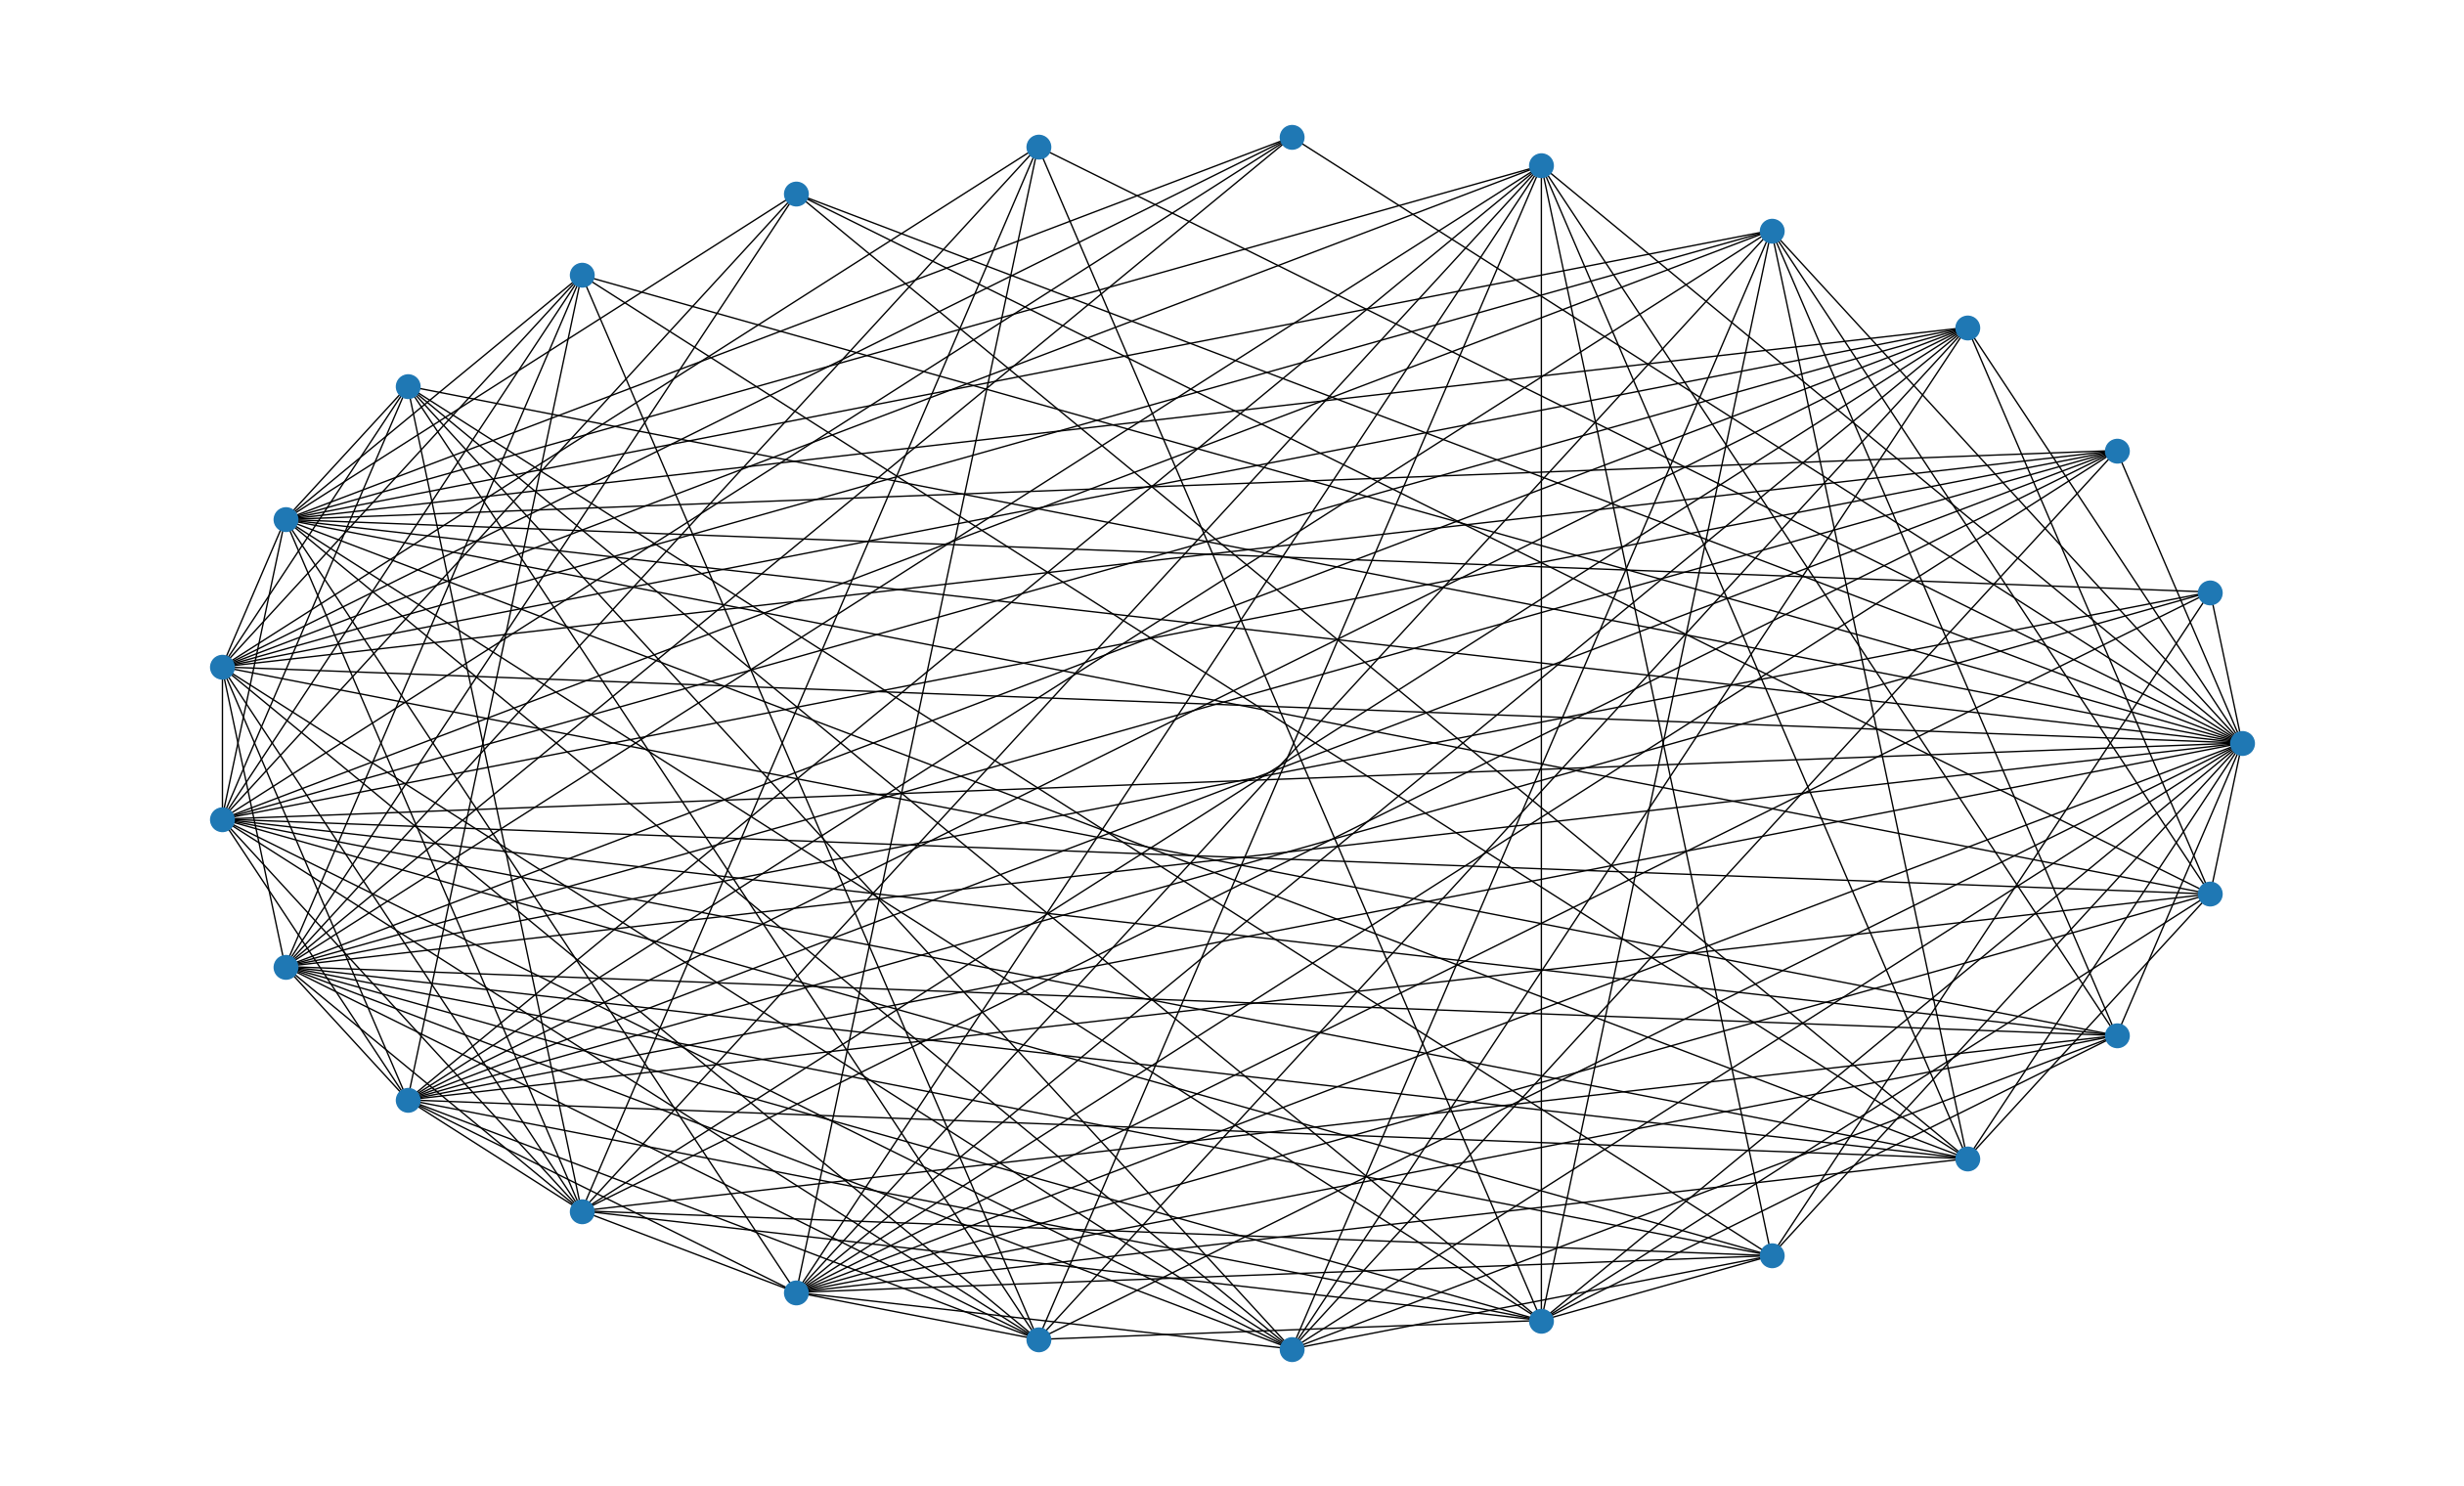

In [67]:
plt.figure(figsize=(25,15))
nx.draw_circular(ba_network)

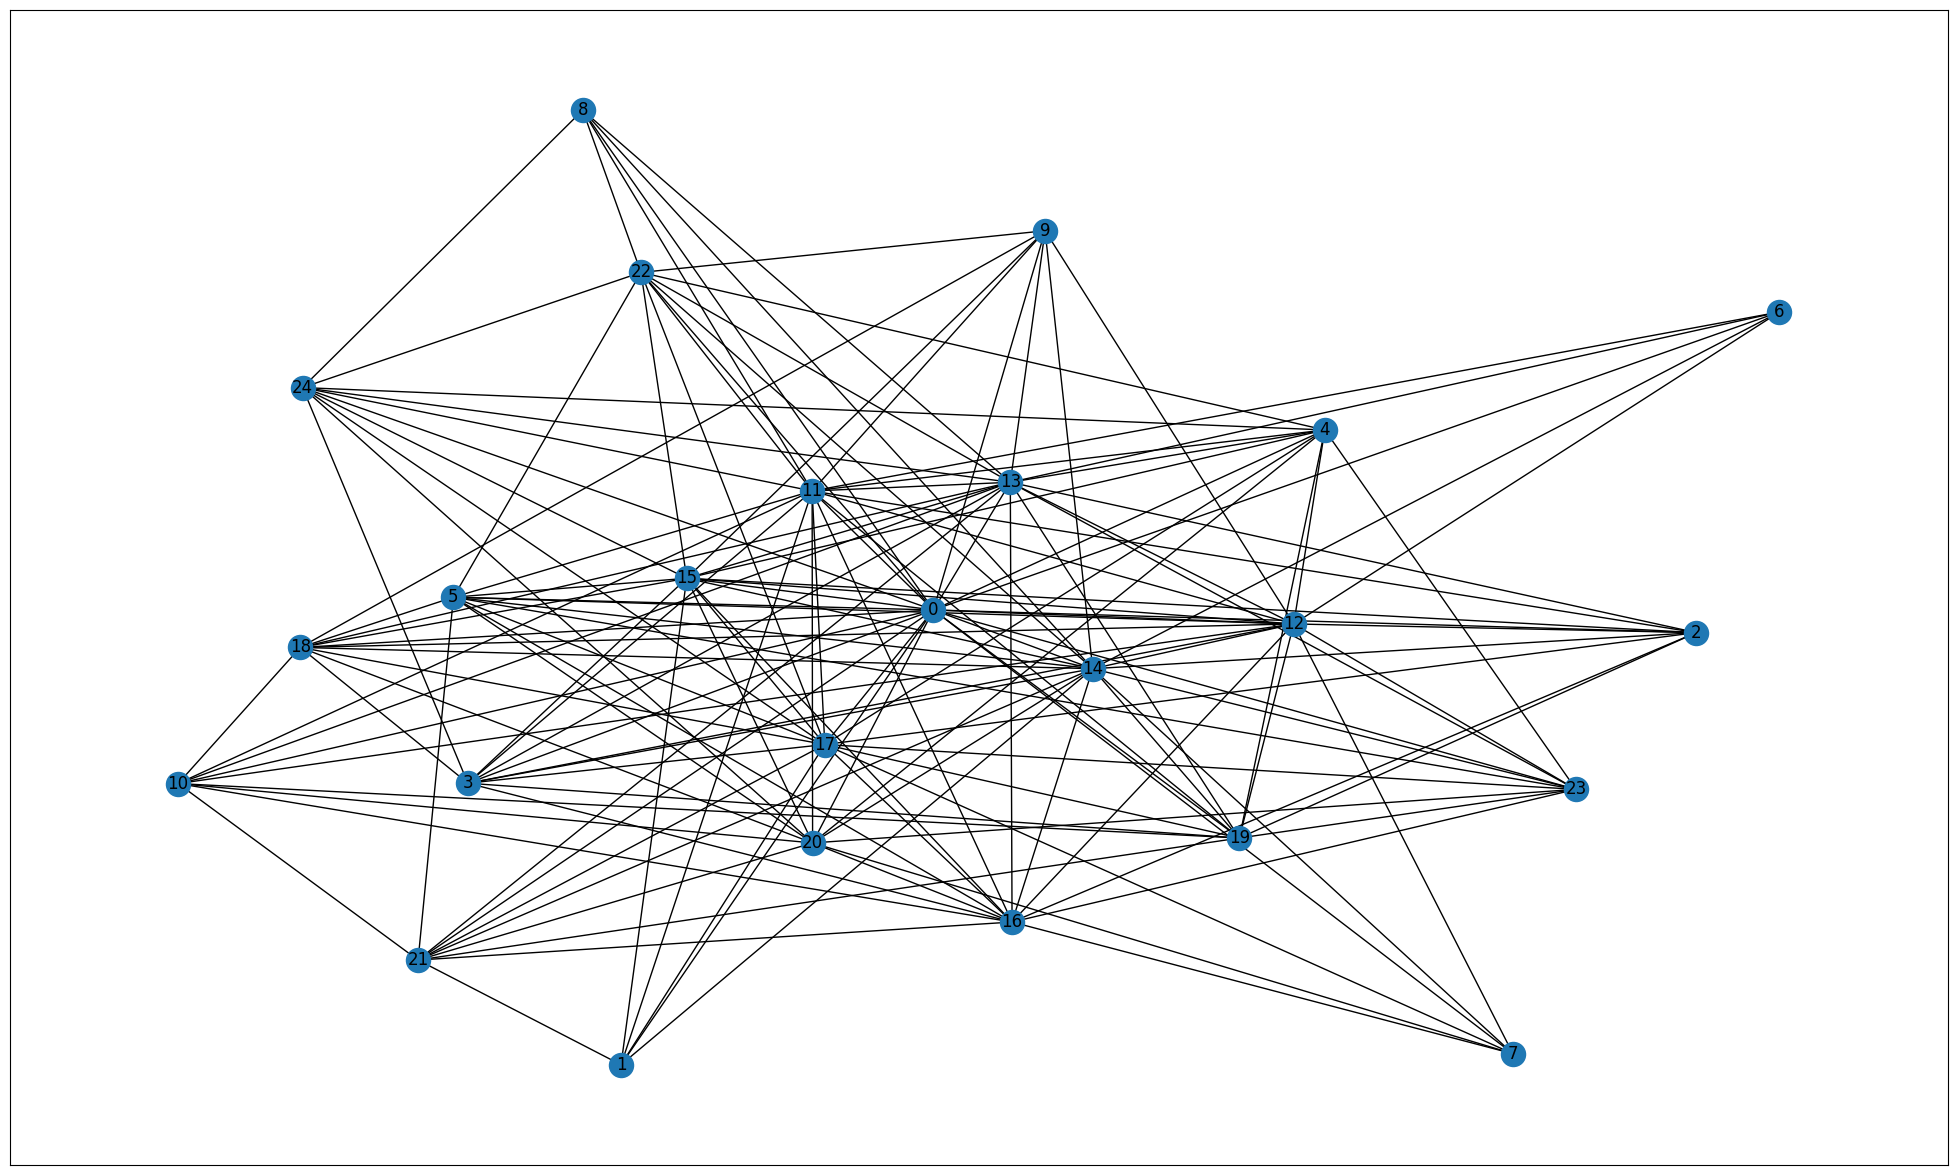

In [68]:
plt.figure(figsize=(25,15))
nx.draw_networkx(ba_network)

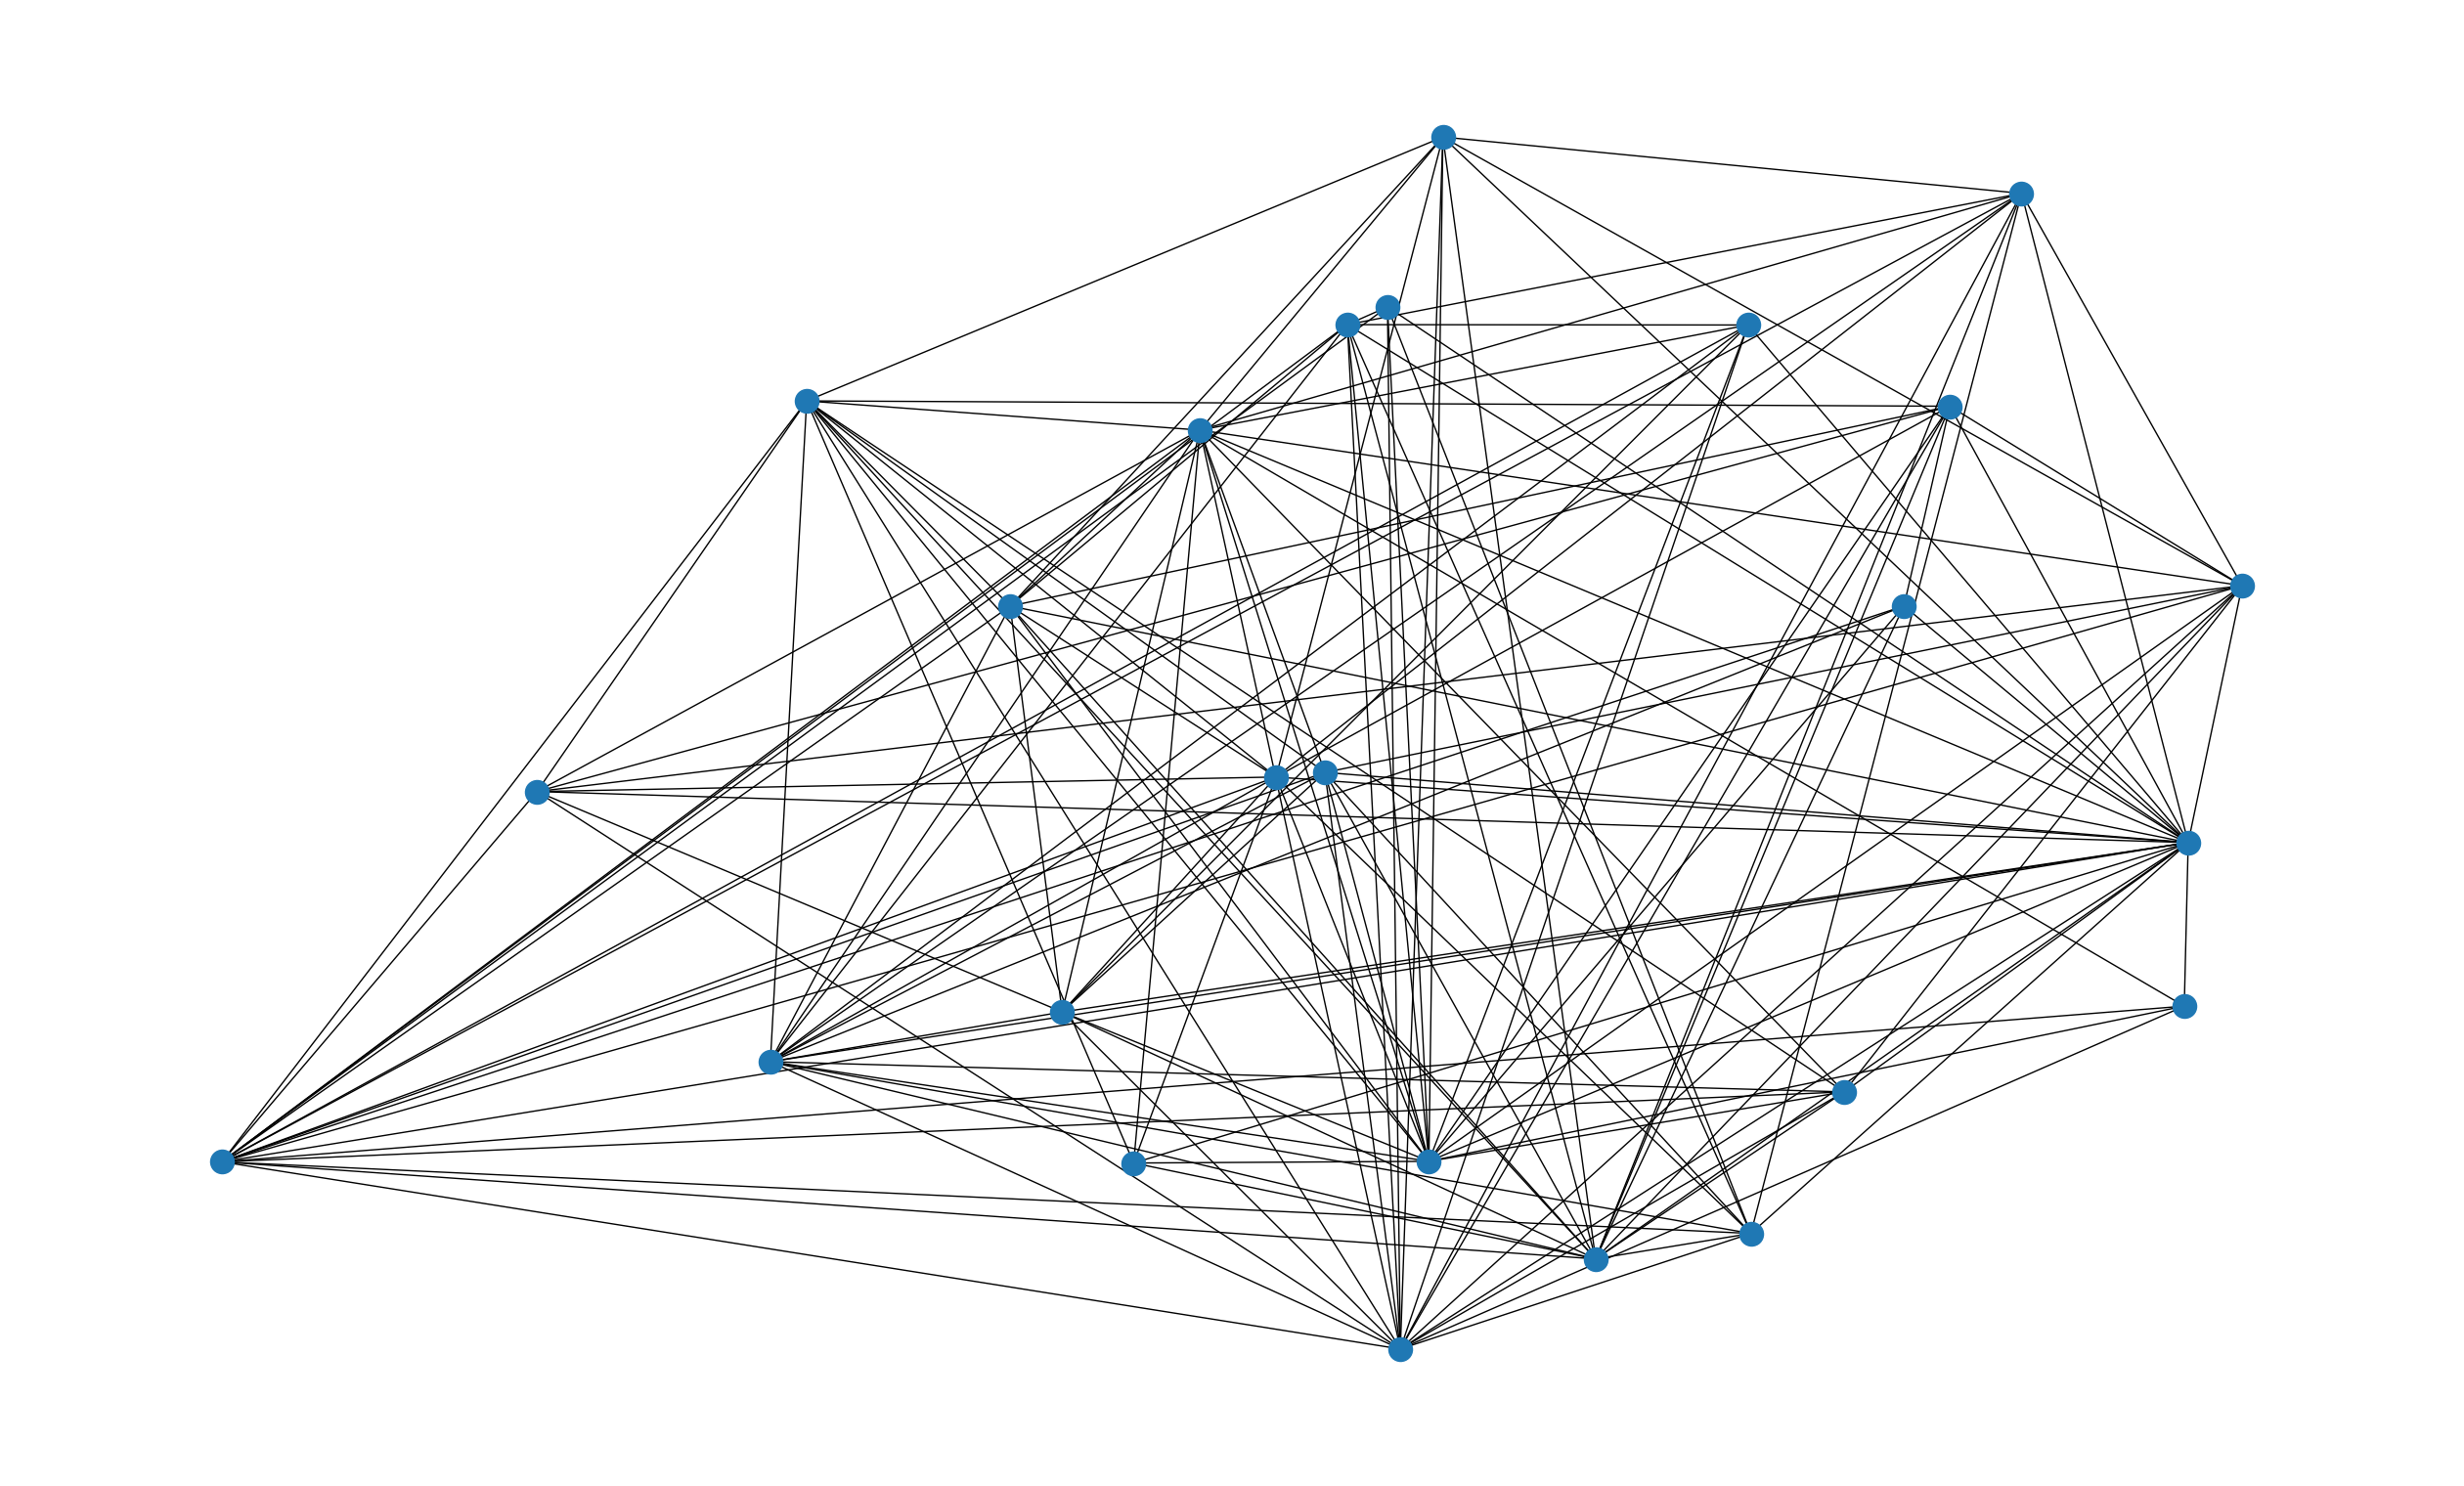

In [69]:
plt.figure(figsize=(25,15))
nx.draw_random(ba_network)

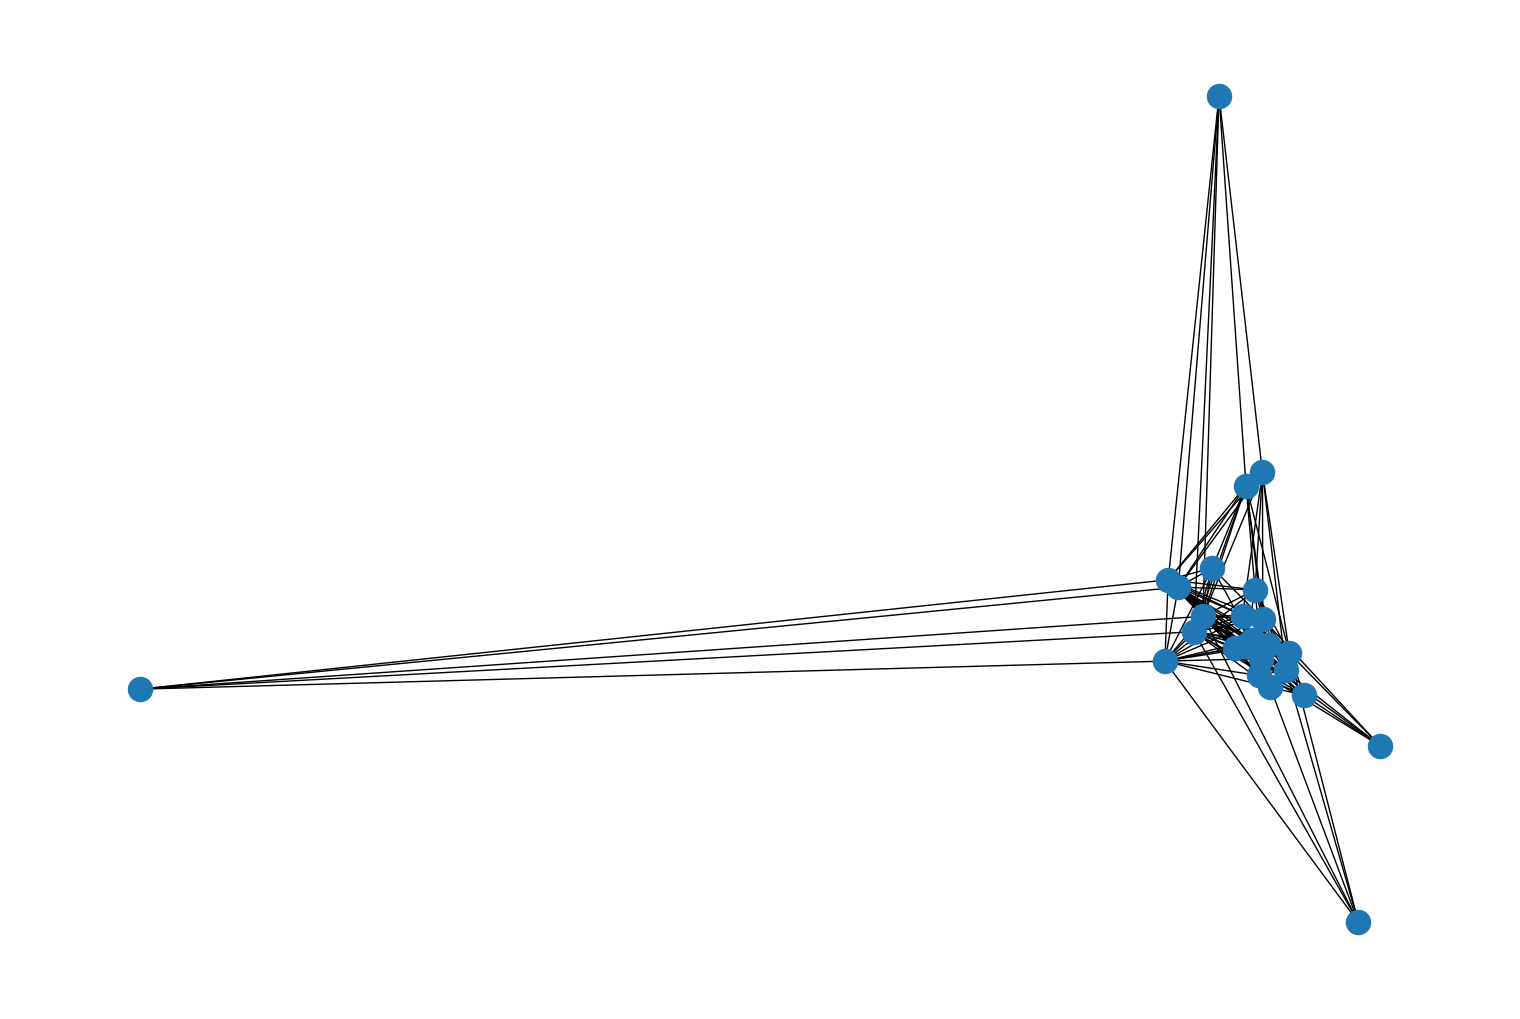

In [70]:
plt.figure(figsize=(15,10))
nx.draw_spectral(ba_network)

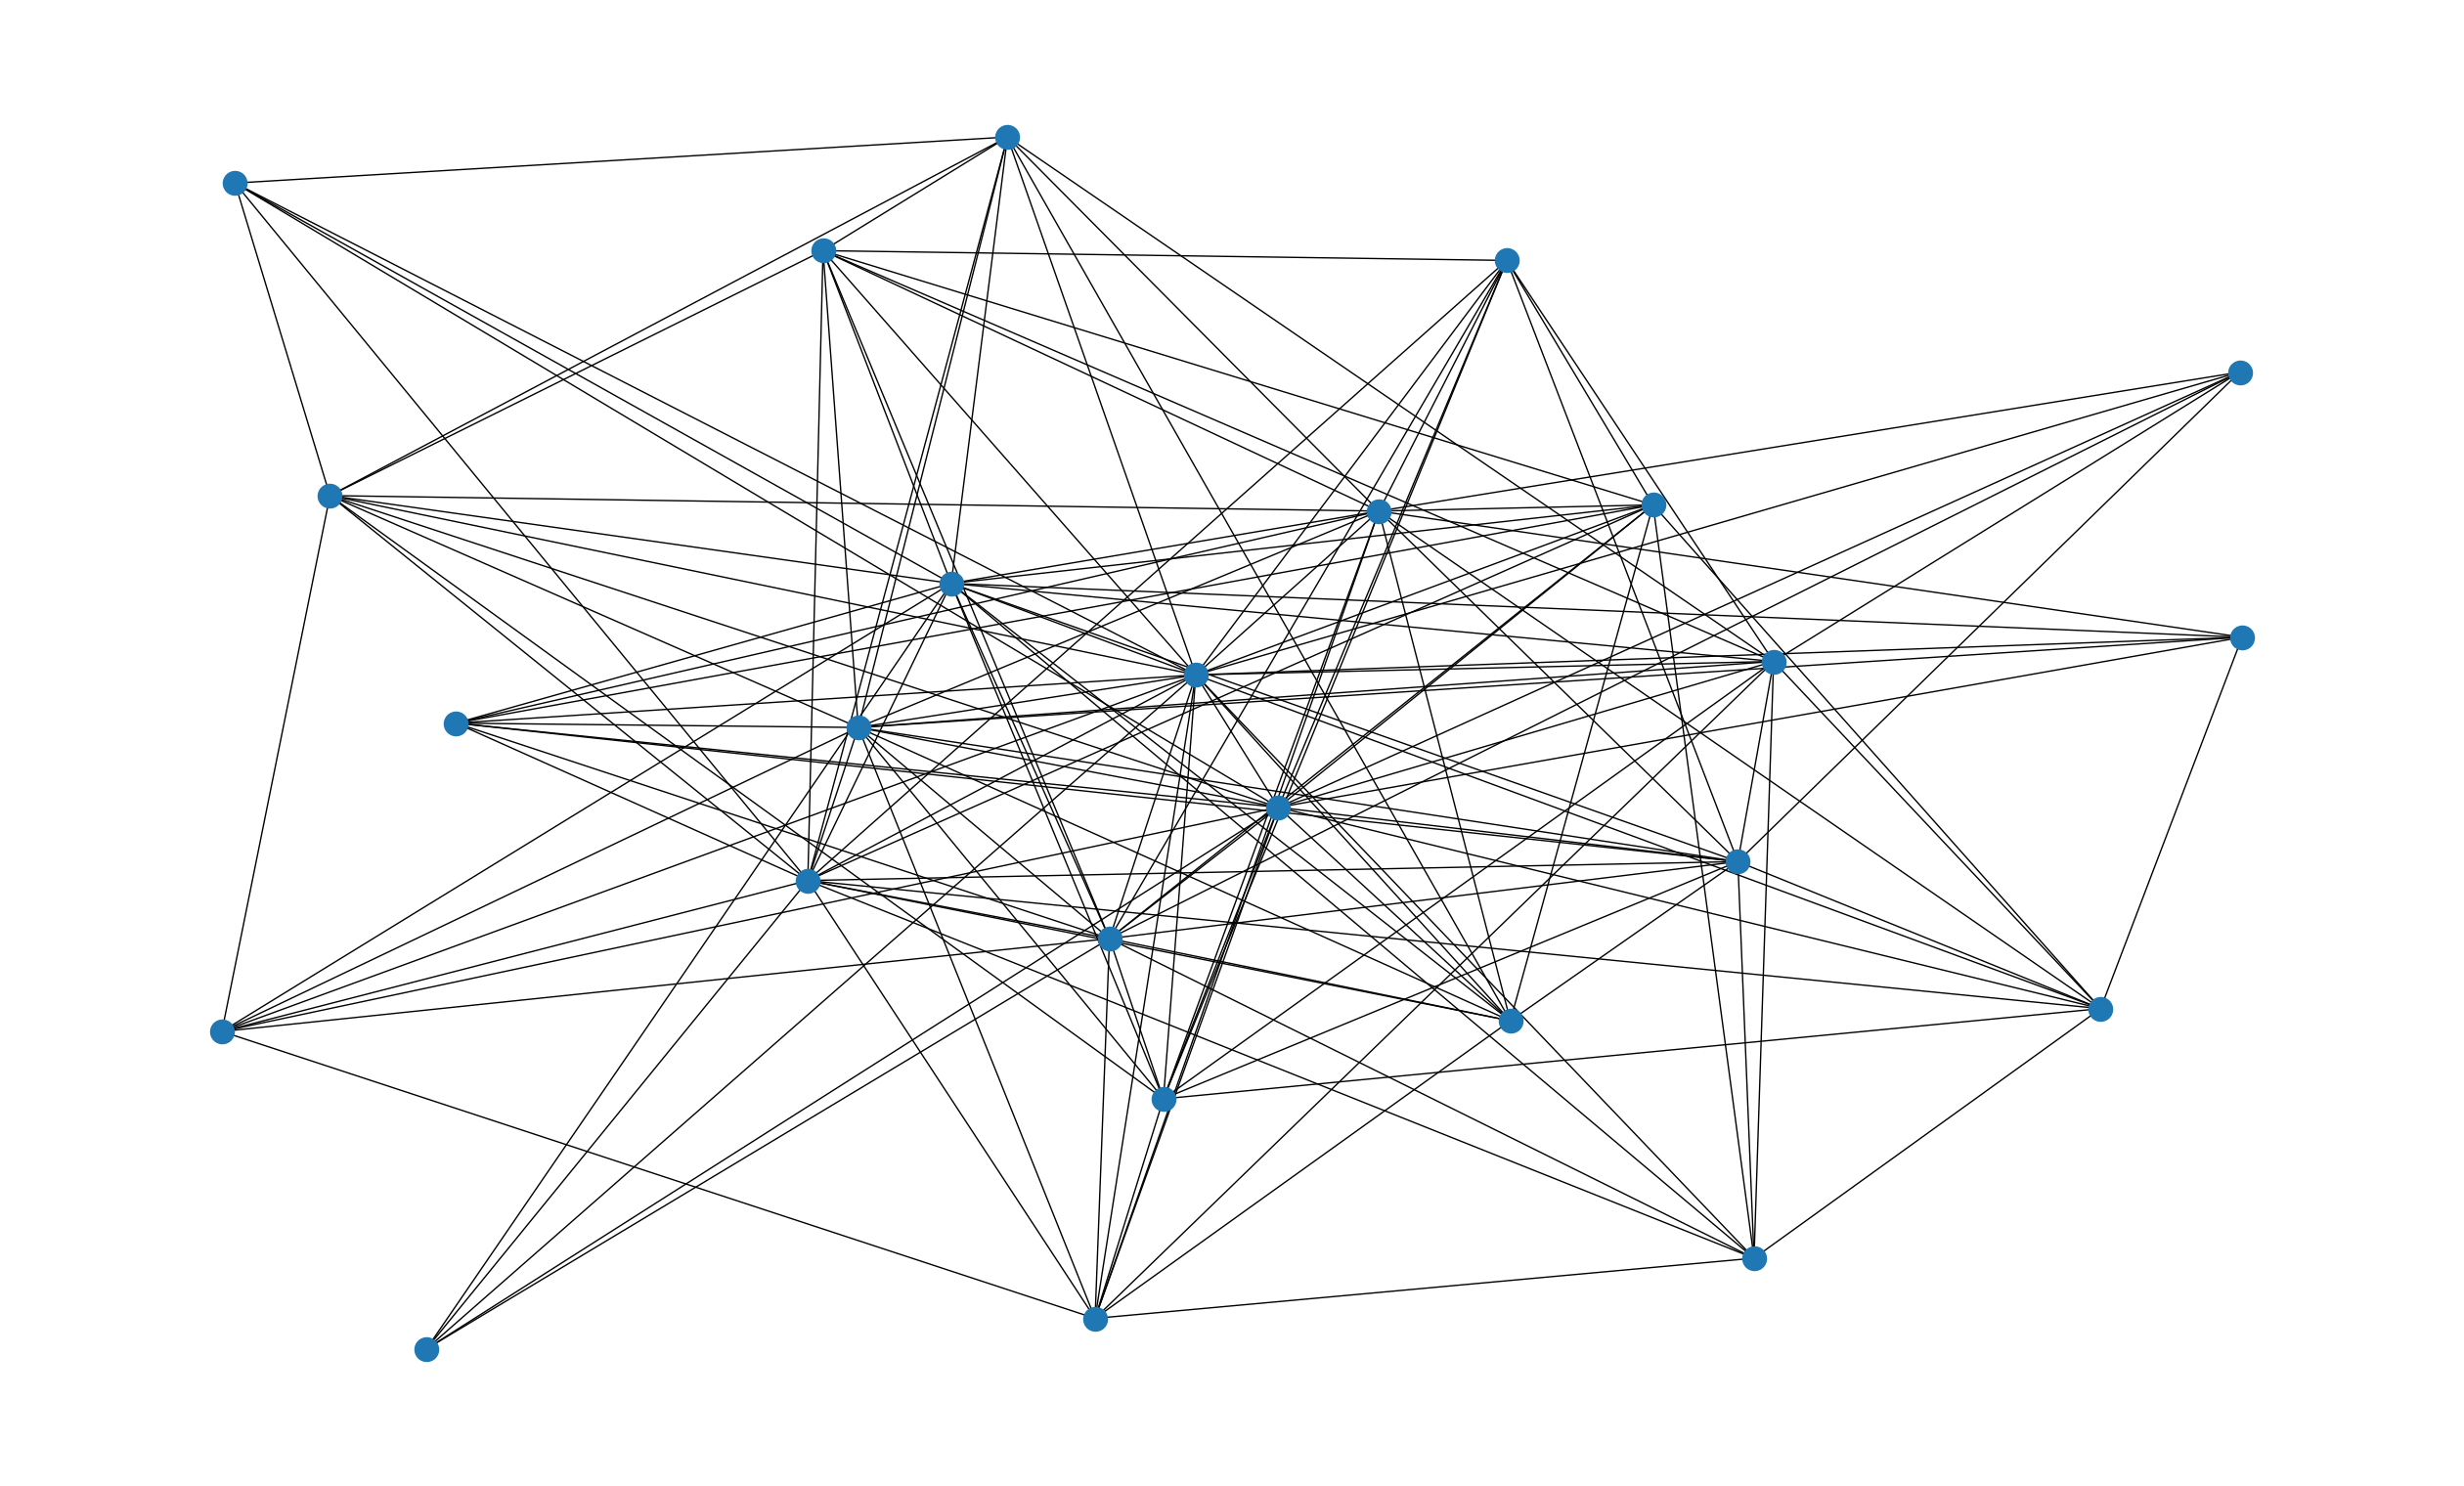

In [71]:
plt.figure(figsize=(25,15))
nx.draw_spring(ba_network)

# 3.3 

Calculate the energies. Assume $k=1$ for the start and $q^2=1.$ We can change them afterwards. About $10\text{-}20$ nodes. E.g. chain graph.

https://networkx.org/documentation/stable/_modules/networkx/drawing/layout.html#spring_layout

https://gist.github.com/mmisono/8972731

https://cs.brown.edu/people/rtamassi/gdhandbook/chapters/force-directed.pdf

In [72]:
from random import random
import math

In [73]:
ba_graph = nx.generators.random_graphs.barabasi_albert_graph(15, 10)

In [74]:
nx.edges(ba_graph)

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (1, 11), (1, 13), (1, 14), (2, 11), (2, 12), (2, 13), (2, 14), (3, 11), (3, 12), (4, 11), (4, 12), (4, 13), (6, 11), (6, 12), (6, 13), (6, 14), (7, 11), (7, 12), (7, 14), (8, 11), (8, 12), (8, 13), (9, 11), (9, 12), (9, 13), (9, 14), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14)])

In [75]:
def attractive_force(x, k):
    return x**2 / k

def repulsive_force(x, k):
    return k**2 / x

In [82]:
def spring_layout(G, iterations=50, width=1, height=1, if_animate=False):
    area = width * height
    k = np.sqrt(area / nx.number_of_nodes(G)) #  optimal distance between nodes
    
    # initial position
    for v in nx.nodes(G):
        G.nodes[v].update({'x': random() * width, 'y': random() * height})
        
    t = width / 10
    dt = t / (iterations + 1)
    
    pos = {}
    
    for i in range(iterations):
        print(f"{i + 1}/{iterations}")
        pos[i] = {}
        
        for v in G.nodes:
            pos[i][v] = (G.nodes[v]['x'], G.nodes[v]['y'])
            
        if if_animate:
            plt.close()
            plt.xlim(0 - t, width + t)
            plt.ylim(0 - 0.1*height, height + 0.1*height)
            plt.axis('off')
            nx.draw_networkx(G, 
                             pos=pos[i], 
                             node_size=10, 
                             width=0.1, 
                             with_labels=False
                            )
            plt.savefig(f"fig/{i}.png")
        
        # repulsive forces
        for v in G.nodes:
            G.nodes[v]['dx'] = 0.0
            G.nodes[v]['dy'] = 0.0
            
            for u in G.nodes:
                if v != u:
                    dx = G.nodes[v]['x'] - G.nodes[u]['x']
                    dy = G.nodes[v]['y'] - G.nodes[u]['y']
                    delta = np.linalg.norm((dx, dy))
                    if delta > 0:
                        dist = repulsive_force(delta, k) / delta
                        G.nodes[v]['dx'] += dx * dist
                        G.nodes[v]['dy'] += dy * dist
                        
        # attractive forces
        for v, u in G.edges:
            dx = G.nodes[v]['x'] - G.nodes[u]['x']
            dy = G.nodes[v]['y'] - G.nodes[u]['y']
            delta = np.linalg.norm((dx, dy))
            if delta > 0:
                dist = attractive_force(delta, k) / delta
                G.nodes[v]['dx'] += - dx * dist
                G.nodes[u]['dx'] += dx * dist
                G.nodes[v]['dy'] += - dy * dist
                G.nodes[u]['dy'] += dy * dist
        
        # limiting the maximum displacement
        for v in G.nodes:
            dx = G.nodes[v]['dx']
            dy = G.nodes[v]['dy']
            displacement = np.linalg.norm((dx, dy))
            if displacement > 0:
                dist = min(displacement, t) / displacement
                x = G.nodes[v]['x'] + dx*dist
                x = min(width, max(0, x)) - width/2
                y = G.nodes[v]['y'] + dy*dist
                y = min(height, max(0, y)) - height/2
                G.nodes[v]['x'] = min(math.sqrt(width**2/4 - y**2), max(-math.sqrt(width**2/4 - y**2), x)) + width/2
                G.nodes[v]['y'] = min(math.sqrt(height**2/4 - x**2), max(-math.sqrt(height**2/4 - x**2), y)) + height/2
        t -= dt
        
    pos = {}
    for v in G.nodes:
        pos[v] = (G.nodes[v]['x'], G.nodes[v]['y'])
    
    if if_animate:
        plt.close()
        plt.xlim(0 - t, width + t)
        plt.ylim(0 - 0.1*height, height + 0.1*height)
        plt.axis('off')
        nx.draw_networkx(G, 
                         pos=pos, 
                         node_size=10, 
                         width=0.1, 
                         with_labels=False
                        )
        plt.savefig(f"fig/final.png")
                

1/20
2/20
3/20
4/20
5/20
6/20
7/20
8/20
9/20
10/20
11/20
12/20
13/20
14/20
15/20
16/20
17/20
18/20
19/20
20/20


/home/marneusz/anaconda3/envs/snars/lib/python3.10/site-packages/matplotlib/animation.py:879: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.



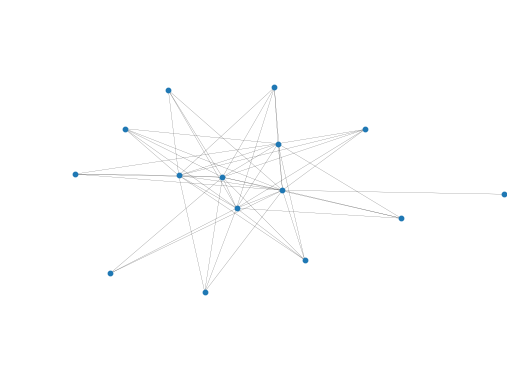

In [83]:
spring_layout(ba_graph, iterations=20, if_animate=True)

In [95]:
from matplotlib.animation import FuncAnimation

In [96]:
%matplotlib notebook

<IPython.core.display.Javascript object>


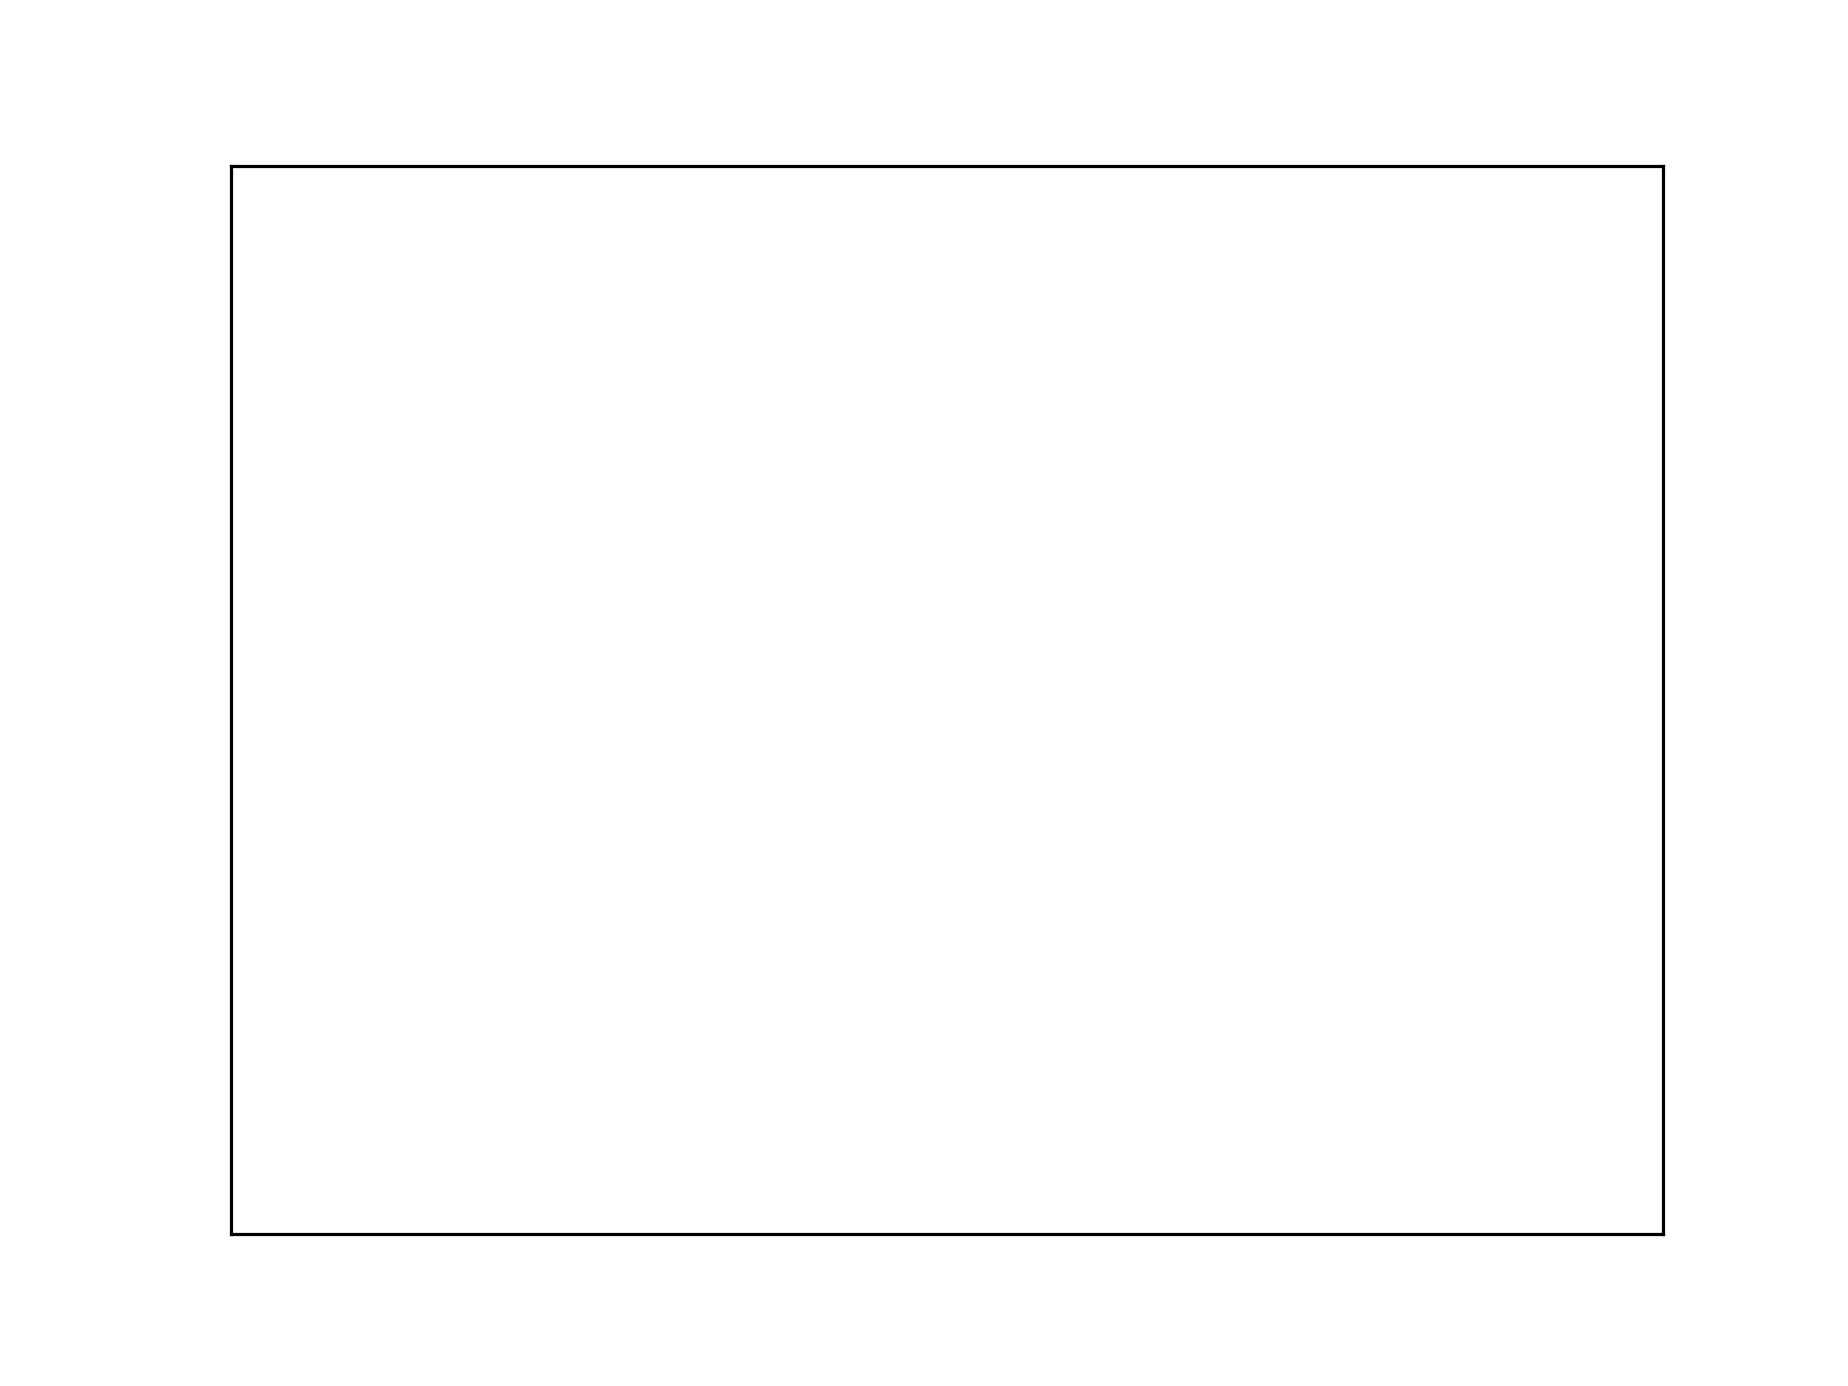

1/1


In [104]:
fig, ax = plt.subplots()
G = ba_graph
nx.draw_networkx(G, spring_layout(G, iterations=1), with_labels=False)

def first_graph():
    nx.draw_networkx(G, spring_layout(G, iterations=1), with_labels=False, ax=ax)
    return ax

def update_graph(it):
    ax.clear()
    nx.draw_networkx(G, spring_layout(G, iterations=it, seed=42), with_labels=False, ax=ax)
    ax.set_title(f"Iteration nr. {round(it)}/50")
    return ax

animation = FuncAnimation(fig, update_graph, frames=np.linspace(0, 50), interval=250, init_func=first_graph)